In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Regresion Lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Evaluacion del Modelo
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_excel('Dataset_final.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Documento                  295 non-null    int64  
 1   Nombre                     295 non-null    object 
 2   Apellidos                  295 non-null    object 
 3   Direccción                 295 non-null    object 
 4   Teléfono                   295 non-null    object 
 5   Edad                       295 non-null    int64  
 6   Estatura                   295 non-null    float64
 7   Área de residencia         294 non-null    object 
 8   Tipo colegio               294 non-null    object 
 9   Género                     294 non-null    object 
 10  Estrato                    294 non-null    float64
 11  Nota Matematicas           294 non-null    float64
 12  Nota Lecto Escritura       294 non-null    float64
 13  Apoyo económico de padres  294 non-null    object 

In [5]:
df

,Documento,Nombre,Apellidos,Direccción,Teléfono,Edad,Estatura,Área de residencia,Tipo colegio,Género,Estrato,Nota Matematicas,Nota Lecto Escritura,Apoyo económico de padres,Último grado cursado
0,115320053,Sofia,Gómez,"Calle 100 #25-26, Bogotá, Colombia",+57 311 2345678,23,1.57,Urbana,Público,Femenino,3.0,1.0,3.0,No,11.0
1,1105101947,Santiago,González,"Carrera 14 #10-20, Medellín, Colombia",+57 317 3456789,19,1.75,Urbana,Privado,Masculino,4.0,5.0,4.0,Sí,11.0
2,1023100010,Valentina,Herrera,"Vereda San José, Girardota, Colombia",+57 312 4567890,16,1.63,Rural,Público,Femenino,1.0,3.0,2.0,Sí,9.0
3,1208200021,Juan,Rojas,"Calle 30 #18-15, Bucaramanga, Colombia",+57 320 5678901,17,1.80,Urbana,Público,Masculino,2.0,2.0,2.0,No,10.0
4,1050500050,Catalina,Jiménez,"Avenida 5 #23-45, Cali, Colombia",+57 319 6789012,15,1.64,Urbana,Privado,Femenino,4.0,4.0,5.0,Sí,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,1645678901,Isabel,Gonzalez,Av. Bolívar 789,3478901,16,1.62,Urbana,Público,Femenino,4.0,4.0,4.0,Si,11.0
291,1656789012,Julio,Perez,El Bosque 234,3123456,18,1.80,Rural,Privado,Masculino,5.0,5.0,5.0,Si,11.0
292,1667890123,Ana,Martinez,Carrera 7 567,3289012,17,1.65,Urbana,Público,Femenino,2.0,3.0,3.0,No,10.0
293,1678901234,David,Perez,Barrio Las Margaritas 123,3256789,16,1.80,Urba,Privado,Masculino,3.0,3.0,3.0,Si,10.0


In [6]:
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 294
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Documento                  294 non-null    int64  
 1   Nombre                     294 non-null    object 
 2   Apellidos                  294 non-null    object 
 3   Direccción                 294 non-null    object 
 4   Teléfono                   294 non-null    object 
 5   Edad                       294 non-null    int64  
 6   Estatura                   294 non-null    float64
 7   Área de residencia         294 non-null    object 
 8   Tipo colegio               294 non-null    object 
 9   Género                     294 non-null    object 
 10  Estrato                    294 non-null    float64
 11  Nota Matematicas           294 non-null    float64
 12  Nota Lecto Escritura       294 non-null    float64
 13  Apoyo económico de padres  294 non-null    object 
 14 

In [7]:
df = df.drop(['Documento', 'Nombre', 'Apellidos', 'Direccción', 'Teléfono'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 294
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Edad                       294 non-null    int64  
 1   Estatura                   294 non-null    float64
 2   Área de residencia         294 non-null    object 
 3   Tipo colegio               294 non-null    object 
 4   Género                     294 non-null    object 
 5   Estrato                    294 non-null    float64
 6   Nota Matematicas           294 non-null    float64
 7   Nota Lecto Escritura       294 non-null    float64
 8   Apoyo económico de padres  294 non-null    object 
 9   Último grado cursado       294 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 25.3+ KB


In [14]:
(df['Apoyo económico de padres'] == 'Si').sum()

0

In [13]:
df['Apoyo económico de padres'] = df['Apoyo económico de padres'].replace('Sí', 'Si')

df['Apoyo económico de padres'] = np.where(df['Apoyo económico de padres'] == 'Si', 1, 0)

df['Género'] = np.where(df['Género'] == 'Femenino', 0, 1)

df['Tipo colegio'] = np.where(df['Tipo colegio'] == 'Público', 0, 1)

df['Área de residencia'] = np.where(df['Área de residencia'] == 'Urbana', 0, 1)

In [10]:
df

,Edad,Estatura,Área de residencia,Tipo colegio,Género,Estrato,Nota Matematicas,Nota Lecto Escritura,Apoyo económico de padres,Último grado cursado
0,23,1.57,0,0,0,3.0,1.0,3.0,0,11.0
1,19,1.75,0,1,1,4.0,5.0,4.0,1,11.0
2,16,1.63,1,0,0,1.0,3.0,2.0,1,9.0
3,17,1.80,0,0,1,2.0,2.0,2.0,0,10.0
4,15,1.64,0,1,0,4.0,4.0,5.0,1,10.0
...,...,...,...,...,...,...,...,...,...,...
290,16,1.62,0,0,0,4.0,4.0,4.0,1,11.0
291,18,1.80,1,1,1,5.0,5.0,5.0,1,11.0
292,17,1.65,0,0,0,2.0,3.0,3.0,0,10.0
293,16,1.80,1,1,1,3.0,3.0,3.0,1,10.0


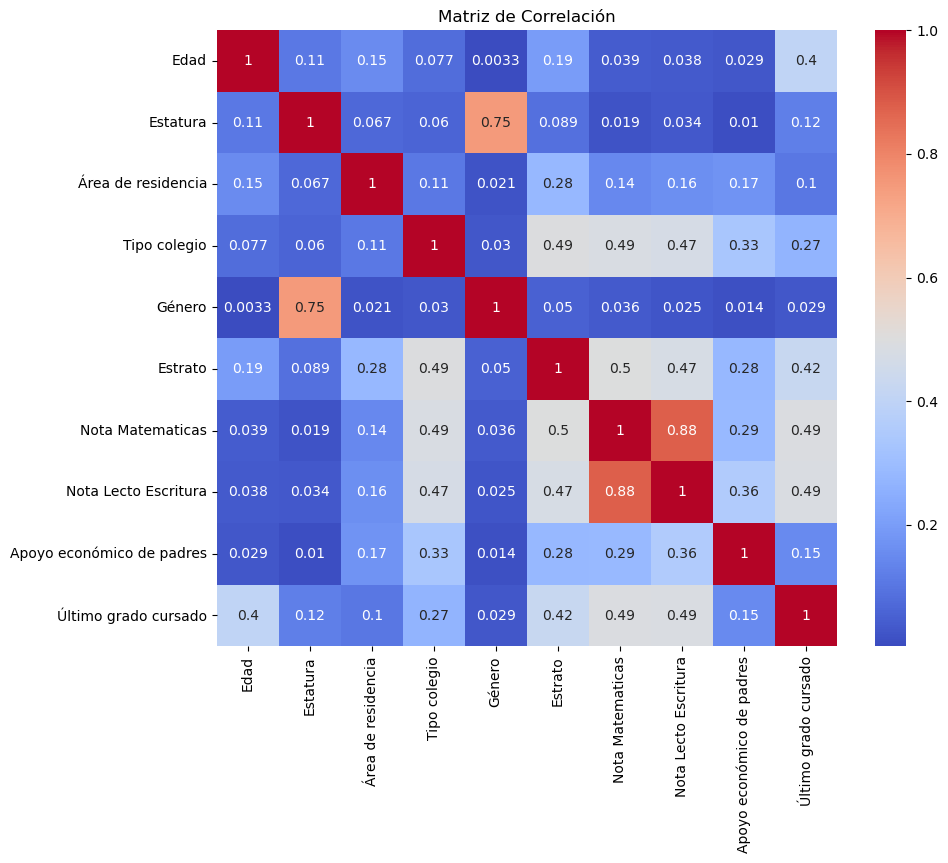

In [11]:
# calcular la matriz de correlación de todas las variables del DataFrame
correlation_matrix = df.corr().abs()

# Excluir la diagonal de la matriz de correlación
#correlation_matrix.values[[range(correlation_matrix.shape[0])]*2] = 0

# Obtener las variables más correlacionadas
most_correlated = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# Visualizar las variables más correlacionadas
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [16]:
df.head()

,Edad,Estatura,Área de residencia,Tipo colegio,Género,Estrato,Nota Matematicas,Nota Lecto Escritura,Apoyo económico de padres,Último grado cursado
0,23,1.57,1,1,1,3.0,1.0,3.0,0,11.0
1,19,1.75,1,1,1,4.0,5.0,4.0,0,11.0
2,16,1.63,1,1,1,1.0,3.0,2.0,0,9.0
3,17,1.80,1,1,1,2.0,2.0,2.0,0,10.0
4,15,1.64,1,1,1,4.0,4.0,5.0,0,10.0


In [17]:
df = df.drop(['Edad', 'Área de residencia', 'Tipo colegio', 'Estrato', 'Último grado cursado'], axis=1)

In [20]:
df.columns = ['estatura', 'genero', 'matematicas', 'lecto_escritura', 'apoyo_economico']

In [22]:
df

,estatura,genero,matematicas,lecto_escritura,apoyo_economico
0,1.57,1,1.0,3.0,0
1,1.75,1,5.0,4.0,0
2,1.63,1,3.0,2.0,0
3,1.80,1,2.0,2.0,0
4,1.64,1,4.0,5.0,0
...,...,...,...,...,...
290,1.62,1,4.0,4.0,0
291,1.80,1,5.0,5.0,0
292,1.65,1,3.0,3.0,0
293,1.80,1,3.0,3.0,0


In [23]:
df['promedio'] = (df['matematicas'] + df['lecto_escritura']) / 2

df

,estatura,genero,matematicas,lecto_escritura,apoyo_economico,promedio
0,1.57,1,1.0,3.0,0,2.0
1,1.75,1,5.0,4.0,0,4.5
2,1.63,1,3.0,2.0,0,2.5
3,1.80,1,2.0,2.0,0,2.0
4,1.64,1,4.0,5.0,0,4.5
...,...,...,...,...,...,...
290,1.62,1,4.0,4.0,0,4.0
291,1.80,1,5.0,5.0,0,5.0
292,1.65,1,3.0,3.0,0,3.0
293,1.80,1,3.0,3.0,0,3.0


In [24]:
df['Riesgo'] = np.where((df['promedio'] < 3.5), 1, 0)

df

,estatura,genero,matematicas,lecto_escritura,apoyo_economico,promedio,Riesgo
0,1.57,1,1.0,3.0,0,2.0,1
1,1.75,1,5.0,4.0,0,4.5,0
2,1.63,1,3.0,2.0,0,2.5,1
3,1.80,1,2.0,2.0,0,2.0,1
4,1.64,1,4.0,5.0,0,4.5,0
...,...,...,...,...,...,...,...
290,1.62,1,4.0,4.0,0,4.0,0
291,1.80,1,5.0,5.0,0,5.0,0
292,1.65,1,3.0,3.0,0,3.0,1
293,1.80,1,3.0,3.0,0,3.0,1


In [26]:
df[df['Riesgo'] == 1]

,estatura,genero,matematicas,lecto_escritura,apoyo_economico,promedio,Riesgo
0,1.57,1,1.0,3.0,0,2.0,1
2,1.63,1,3.0,2.0,0,2.5,1
3,1.80,1,2.0,2.0,0,2.0,1
8,1.78,1,3.0,3.0,0,3.0,1
9,1.65,1,2.0,2.0,0,2.0,1
...,...,...,...,...,...,...,...
287,1.62,1,1.0,1.0,0,1.0,1
288,1.70,1,2.0,2.0,0,2.0,1
289,1.78,1,3.0,3.0,0,3.0,1
292,1.65,1,3.0,3.0,0,3.0,1


In [28]:
variables = ['matematicas', 'lecto_escritura', 'apoyo_economico']

x = df[variables]
y = df['Riesgo']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [29]:
print('Coeficiente de determinación: %.2f' % r2_score(y_test, y_pred))
print('Error cuadrático medio: %.2f' % mean_squared_error(y_test, y_pred))

Coeficiente de determinación: 0.66
Error cuadrático medio: 0.08


In [30]:
nmat = 3.5
nlecto = 4
apoyo = 1

pred = model.predict([[nmat, nlecto, apoyo]])
pred_porcentaje = pred[0] * 100
print(f"Predicción de Riesgo: {round(pred_porcentaje, 2)} %")

Predicción de Riesgo: 30.56%


c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
